In [1]:
from glob import glob
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path= glob('data/*.edf')

In [3]:
len(file_path)

28

In [4]:
file_path[0]

'data\\h01.edf'

In [5]:
healthy=[i for i in file_path if 'h' in i.split('\\')[1] ]
patient=[i for i in file_path if 's' in i.split('\\')[1] ]
print(len(healthy),len(patient))

14 14


In [6]:
def read_data(file_path): 
    data=mne.io.read_raw_edf(file_path, preload=True)
    data.set_eeg_reference() 
    data.filter(l_freq=0.5,h_freq=45)
    epochs=mne.make_fixed_length_epochs(data, duration=5, overlap=1)
    array= epochs.get_data()
    
    return array

In [7]:
sample=read_data(healthy[0])

Extracting EDF parameters from C:\Users\Viraj Wadke\Desktop\Projects\minie_project_eeg\data\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
231 matching events found
No baseline correction applied
0 pr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


0 bad epochs dropped


In [8]:
sample.shape

(231, 19, 1250)

In [9]:
%%capture
control_epochs_healthy=[read_data(i) for i in healthy]
epochs_patient=[read_data(i) for i in patient]

In [10]:
control_epochs_healthy[0].shape,control_epochs_healthy[1].shape

((231, 19, 1250), (227, 19, 1250))

In [11]:
healthy_labels=[len(i)*[0] for i in control_epochs_healthy]
patient_labels=[len(i)*[1] for i in epochs_patient]
len(healthy_labels)

14

In [12]:
data=control_epochs_healthy+epochs_patient
label=healthy_labels+patient_labels

In [13]:
group=[[i]*len(j) for i,j in enumerate(data)]
len(group)

28

In [14]:
group[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
group[1]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [16]:
data_array=np.vstack(data)
label_array=np.hstack(label)
group_array=np.hstack(group)
print(data_array.shape,label_array.shape,group_array.shape)

(7201, 19, 1250) (7201,) (7201,)


In [17]:
from scipy import stats
def mean(data):
    return np.mean(data,axis=-1)
    
def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
        return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)


def maxim(data):
      return np.max(data,axis=-1)

def argminim(data):
      return np.argmin(data,axis=-1)


def argmaxim(data):
      return np.argmax(data,axis=-1)

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data)),axis=-1)

In [18]:
from tqdm import tqdm_notebook
features=[]
for data in tqdm_notebook(data_array):
    features.append(concatenate_features(data))
features=np.array(features)
features.shape

C:\Users\Viraj Wadke\AppData\Local\Temp\ipykernel_7360\3783067424.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/7201 [00:00<?, ?it/s]

(7201, 247)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate 

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, GroupKFold

# Define the Support Vector Machine classifier
clf = SVC()

# Define GroupKFold cross-validation
gkf = GroupKFold(n_splits=5)

# Define the parameter grid for grid search
param_grid = {'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 8, 10, 12, 15]}

# Construct the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', clf)])

# Construct the GridSearchCV model
model = GridSearchCV(pipe, param_grid, cv=gkf, n_jobs=16)

# Fit the model
model.fit(features, label_array, groups=group_array)


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=16,
             param_grid={'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5,
                                           8, 10, 12, 15]})

In [21]:
import pickle

# Assuming you have a trained model named 'model'
# model = ...

# Specify the file path where you want to save the model
file_path = 'modelfinal.pkl'

# Save the model to a file
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

Model saved successfully.


In [24]:
best_model = grid_search.best_estimator_
best_model.save("model2.h5")

NameError: name 'grid_search' is not defined

In [48]:
best_score = model.best_score_
print("Best mean cross-validated score:", best_score)


Best mean cross-validated score: 0.6629102299767442


In [50]:
def predict_mental_disorder(features):
    # Use the best estimator from GridSearchCV
    best_estimator = model.best_estimator_
    
    # Predict labels for the input features
    predictions = best_estimator.predict(features)
    
    return predictions

# Generate a sample input for testing
sample_input = features[0].reshape(1, -1)  # Reshape to match the expected input shape

# Predict whether the sample input indicates a mental disorder or not
prediction = predict_mental_disorder(sample_input)
print("Sample prediction:", prediction)


Sample prediction: [0]


In [51]:
# Sample feature array for a healthy patient
sample_healthy_patient_features = control_epochs_healthy[0][:1]  # Select features for the first healthy patient
print("Sample feature array for a healthy patient:", sample_healthy_patient_features.shape)

# Sample feature array for a patient with schizophrenia
sample_schizophrenia_patient_features = epochs_patient[0][:1]  # Select features for the first patient with schizophrenia
print("Sample feature array for a patient with schizophrenia:", sample_schizophrenia_patient_features.shape)


Sample feature array for a healthy patient: (1, 19, 1250)
Sample feature array for a patient with schizophrenia: (1, 19, 1250)


In [68]:
def predict_mental_disorder(features):
    # Use the best estimator from GridSearchCV
    best_estimator = model.best_estimator_
    
    # Predict labels for the input features
    predictions = best_estimator.predict(features)
    
    # Map predictions to human-readable labels
    prediction_labels = ['Healthy' if label == 0 else 'Schizophrenia' for label in predictions]
    
    return prediction_labels, features

# Predict whether the sample input indicates a healthy patient or a patient with schizophrenia
prediction_labels, input_features = predict_mental_disorder(sample_input)
print("Sample prediction labels:", prediction_labels)
print("Input features:", input_features)



Sample prediction labels: ['Healthy']
Input features: [[-3.80932863e-07 -1.38311332e-07 -4.08967639e-08  3.50377829e-08
  -9.00192403e-08  2.04127841e-07  4.65616321e-07  1.19992102e-07
   2.35581509e-08  1.73079497e-09 -6.64163650e-08 -8.91064454e-08
  -9.62212906e-08  2.01877478e-07  1.21259390e-07 -1.24844992e-08
   1.93079945e-08 -1.76869496e-07 -1.01249559e-07  9.36537524e-06
   9.42470391e-06  5.65202514e-06  8.74859729e-06  2.01249903e-05
   7.61104571e-06  7.59691063e-06  5.18899357e-06  9.64855648e-06
   1.85989396e-05  7.10634818e-06  5.09722423e-06  5.32690136e-06
   6.33333787e-06  4.68171148e-06  4.88836562e-06  6.97729554e-06
   1.03901482e-05  6.34563096e-06  5.03372426e-05  5.81657584e-05
   3.58297105e-05  6.08117505e-05  1.07490437e-04  4.31849873e-05
   5.12266904e-05  3.74606562e-05  7.50750568e-05  1.12729949e-04
   4.43977541e-05  3.21156847e-05  3.50597554e-05  3.85177883e-05
   3.05953395e-05  3.48580876e-05  3.80671706e-05  9.38109712e-05
   3.84188083e-05  8.7

In [5]:
from glob import glob
import mne
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define a function to read data from .edf file and extract features
def extract_features_from_edf(file_path):
    # Read EEG data from the .edf file
    data = mne.io.read_raw_edf(file_path, preload=True)
    
    # Preprocess the EEG data (e.g., reference, filtering)
    data.set_eeg_reference()
    data.filter(l_freq=0.5, h_freq=45)
    
    # Create epochs (fixed-length segments of EEG data)
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=1)
    
    # Extract EEG data as numpy array
    array = epochs.get_data()
    
    # Define feature extraction functions
    def extract_features(data):
        # Define feature extraction process here
        # For example, calculate mean and standard deviation along the time axis for each channel
        mean = np.mean(data, axis=2)  # Calculate mean
        std = np.std(data, axis=2)     # Calculate standard deviation
        features = np.concatenate((mean, std), axis=1)  # Concatenate features
        
        return features
    
    # Extract features from EEG data
    features = extract_features(array)
    
    return features

# Define a function to predict mental disorder from features
def predict_mental_disorder(features):
    # Use the best estimator from GridSearchCV
    best_estimator = model.best_estimator_
    
    # Predict labels for the input features
    predictions = best_estimator.predict(features)
    
    # Map predictions to human-readable labels
    prediction_labels = ['Healthy' if label == 0 else 'Schizophrenia' for label in predictions]
    
    return prediction_labels, features

# Define a function to process .edf file and predict mental disorder
def process_edf_and_predict(file_path):
    # Extract features from the .edf file
    features = extract_features_from_edf(file_path)
    print("Shape of extracted features:", features.shape)
    
    # Standardize the extracted features
    sample_features_scaled = scaler.transform(features)
    
    # Predict mental disorder using the features
    prediction_labels = predict_menatal_disorder(sample_features_scaled)
    
    return prediction_labels, features

# Example usage:
# File path of the .edf file
edf_file_path = "data\\h01.edf"

# Load the trained model
# Define the model and scaler variables here

# Process .edf file and predict mental disorder
prediction_labels, input_features = process_edf_and_predict(edf_file_path)

# Print the prediction labels and input features
print("Prediction labels:", prediction_labels)
print("Input features:", input_features)


Extracting EDF parameters from C:\Users\Viraj Wadke\Desktop\Projects\minie_project_eeg\data\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


231 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 231 events and 1250 original time points ...
0 bad epochs dropped
Shape of extracted features: (231, 38)


AttributeError: 'NoneType' object has no attribute 'transform'

Extracting EDF parameters from C:\Users\Viraj Wadke\Desktop\Projects\minie_project_eeg\data\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Using matplotlib as 2D backend.


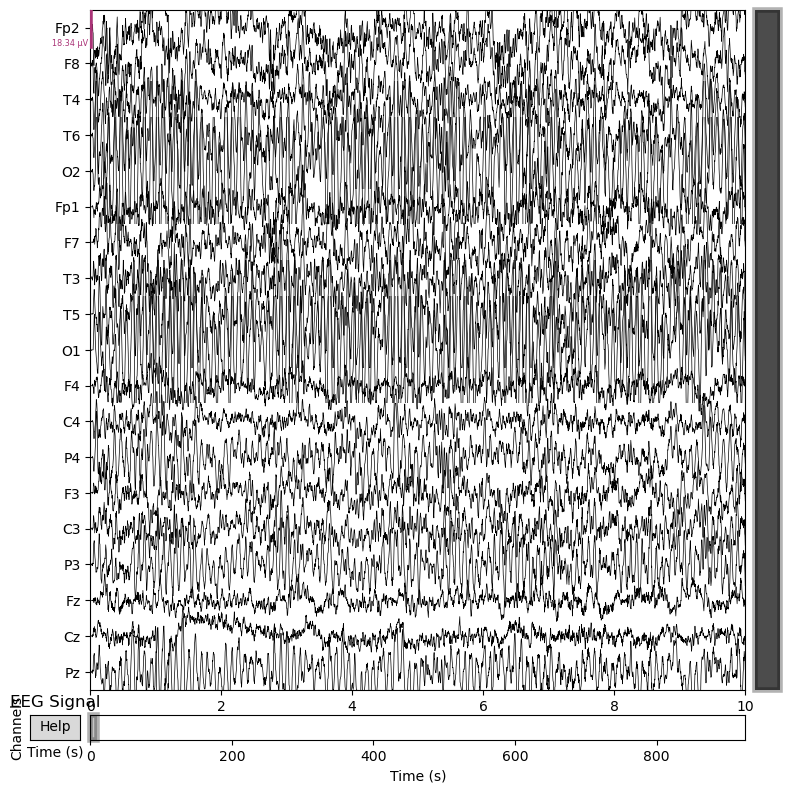

In [1]:
import mne
import matplotlib.pyplot as plt

# Define a function to read EEG data from .edf file
def read_eeg_data(file_path):
    # Read EEG data from the .edf file
    data = mne.io.read_raw_edf(file_path, preload=True)
    return data

# Define a function to plot EEG data as an image
def plot_eeg_image(data):
    # Plot EEG data as an image
    data.plot(scalings='auto', show=False)
    plt.xlabel('Time (s)')
    plt.ylabel('Channels')
    plt.title('EEG Signal')
    plt.show()

# Example usage:
# File path of the .edf file
edf_file_path = "data\\h01.edf"

# Read EEG data from the .edf file
eeg_data = read_eeg_data(edf_file_path)

# Plot EEG data as an image
plot_eeg_image(eeg_data)


Extracting EDF parameters from C:\Users\Viraj Wadke\Desktop\Projects\minie_project_eeg\data\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...


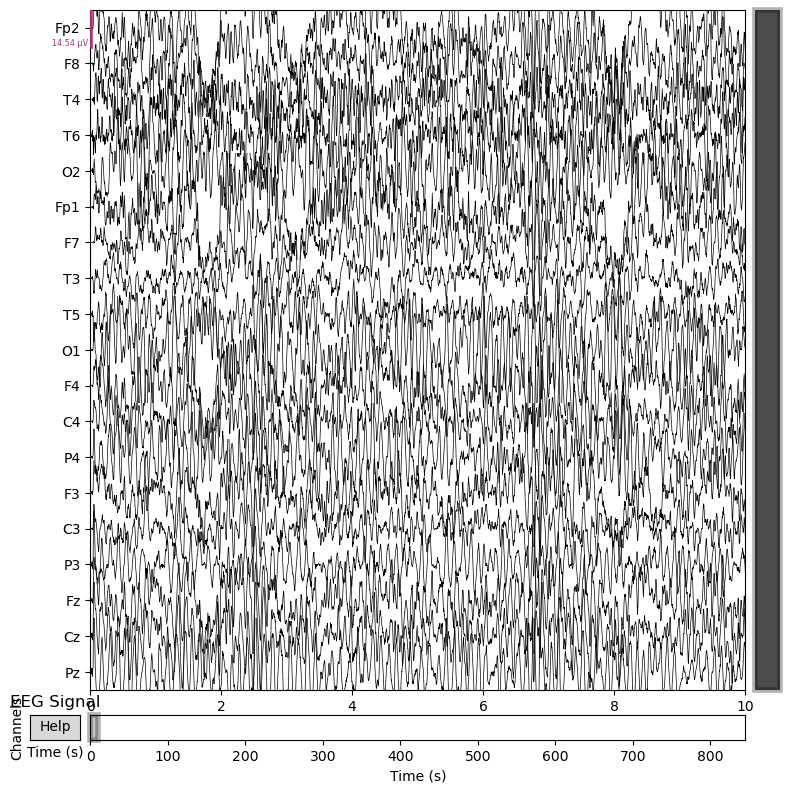

In [2]:
import mne
import matplotlib.pyplot as plt

# Define a function to read EEG data from .edf file
def read_eeg_data(file_path):
    # Read EEG data from the .edf file
    data = mne.io.read_raw_edf(file_path, preload=True)
    return data

# Define a function to plot EEG data as an image
def plot_eeg_image(data):
    # Plot EEG data as an image
    data.plot(scalings='auto', show=False)
    plt.xlabel('Time (s)')
    plt.ylabel('Channels')
    plt.title('EEG Signal')
    plt.show()

# Example usage:
# File path of the .edf file
edf_file_path = "data\\s01.edf"

# Read EEG data from the .edf file
eeg_data = read_eeg_data(edf_file_path)

# Plot EEG data as an image
plot_eeg_image(eeg_data)
